In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing and reading dataset

ds = pd.read_csv("Social_Network_Ads.csv")

In [7]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
# Searching for duplicates

ds.duplicated().sum()

0

In [15]:
# Removing Duplicates

ds.drop_duplicates(inplace = True)

In [25]:
# Finding missing values

ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
# Splitting as Indepedent and Dependent variables

X = ds[['Age', 'EstimatedSalary']]
y = ds[['Purchased']]

In [33]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = ['Age', 'EstimatedSalary'])

In [35]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [37]:
len(X_test)

37

In [39]:
# applying the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Predict for myinput

myinput = pd.DataFrame(sc.transform([[30, 150000]]), columns =  ['Age', 'EstimatedSalary'])
classifier.predict(myinput)

array([0], dtype=int64)

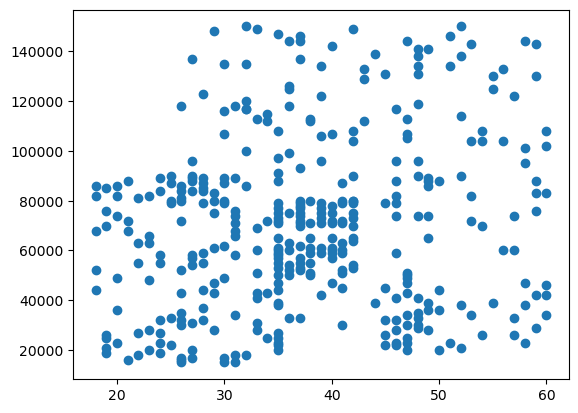

In [45]:
# Visualization 

original_X = pd.DataFrame(sc.inverse_transform(X), columns =  ['Age', 'EstimatedSalary'])
plt.scatter(original_X["Age"], original_X["EstimatedSalary"])
plt.show()

In [35]:
# User Input

age = float(input("Enter Age: "))
salary = float(input("Enter Estimated Salary: "))

myinput = pd.DataFrame(sc.transform([[age, salary]]), columns=['Age', 'EstimatedSalary'])

result = classifier.predict(myinput)

if result[0] == 1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")
    

Enter Age:  45
Enter Estimated Salary:  50000


Prediction: User will not purchase plan


In [49]:
# Cheaking Accuracy of logistic regression model

from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

Accuracy of the logistic regression model: 83.78%


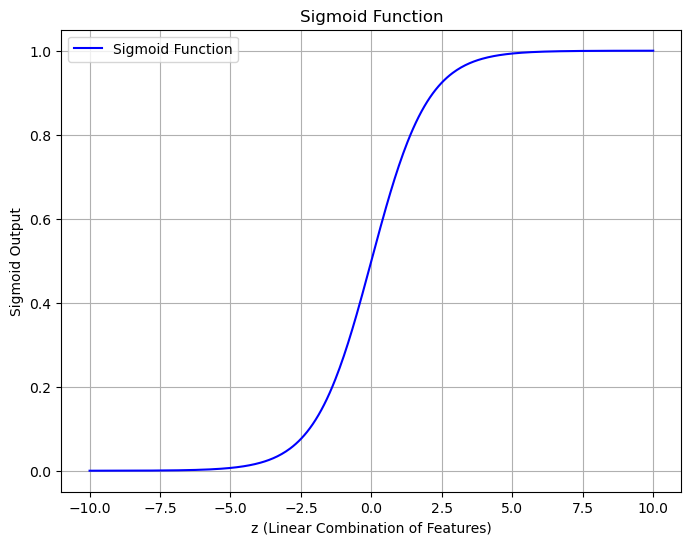

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 1. Plot the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 400)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label="Sigmoid Function", color="b")
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("Sigmoid Output")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# plot sigmoid function

In [12]:
# to cheak accuracy score